In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys
import warnings

os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/usr/lib/cuda"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" 
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/usr/lib/cuda"
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")


# Plotting
import matplotlib.pyplot as plt
import scienceplots # Need to import science plots
plt.style.use(['science'])
plt.rcParams['text.usetex'] = False # This is in case there are any issues with tex, turn to true if you have it and want nice plots with tex

# Essentials
import numpy as np
import pandas as pd
from gwpy.timeseries import TimeSeries
import bilby


In [4]:
from glitchstream.glitch_population import GlitchPopulation
from glitchstream.glitch_generator import GlitchGenerator
from glitchstream.glitch_stream import GlitchFrameGenerator    

In [5]:
# glitch population takes random gpss from gravity spy correpsonding to glitches with
# user defined properties (labels, original snr, original interferometer...)
glitch_population = GlitchPopulation(glitch_labels=["Blip",
                                                    "Tomte",
                                                    "Koi_Fish",
                                                    "Scattered_Light",
                                                    "Low_Frequency_Bursts"])

# glitch_generator takes a glitch population as argument and then extract the correpsonfing glitch   
# with the "get_random_glitch" method
glitch_generator  = GlitchGenerator(glitch_population=glitch_population)


# glitch frame generator injects glitches from glitch_generator in a arbitrary psd or returns whitened strain

ifo = bilby.gw.detector.InterferometerList(["H1","L1"])[0]
glitch_stream = GlitchFrameGenerator(glitch_generator = glitch_generator,
                                     detector=ifo,
                                     duration = 10, # frame duration
                                     glitch_rate = 1/4, # rate of glitches per second.  
                                     fmin = 15) # fmin for the glitch. withy LIGO psds its better to not go below this



reading dataset H1 O3a... 
reading dataset H1 O3b... 
reading dataset L1 O3a... 
reading dataset L1 O3b... 
succesfully loaded Deepextractor model from /home/kfang/gwsim/glitchstream/glitchstream/deepextractor/checkpoints/DeepExtractor_257/checkpoint_best_real_noise_base.pth.tar 
succesfully loaded scaler from /home/kfang/gwsim/glitchstream/glitchstream/deepextractor/checkpoints/scaler.pkl 


/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
from pathlib import Path
from glitchstream.glitch_downloader import GlitchDownloader

np.random.seed(1234)
gps_time_test, ifo_test, glitch_metadata_test = glitch_population.sample()
segment_start_test = gps_time_test - 21
segment_end_test = gps_time_test + 7
glitch_downloader = GlitchDownloader()
download_data_test = glitch_downloader.download_open_data(ifo=ifo_test,start_segment=segment_start_test,end_segment=segment_end_test)
print(download_data_test)
#path = Path("download_test")
#path.mkdir(parents=True, exist_ok=True)
#download_data_test.write(f'{path}/{ifo_test}_{int(segment_start_test)}-{int(segment_end_test)}_test.gwf',format='gwf')

In [ ]:
array_test = np.asarray(download_data_test)
print(array_test[150:160])

In [ ]:
new_data_test = TimeSeries(download_data_test, dt = 1/glitch_downloader.sampling_frequency, t0=segment_start_test)
t = new_data_test.times
plt.figure(figsize=[15,5])
plt.plot(t, new_data_test)

series_new = download_data_test.crop(gps_time_test - 1 , gps_time_test + 1)
plot = series_new.plot()
plt.show()

print(len(np.asarray(new_data_test)),len(series_new))

In [ ]:
print(type(glitch_metadata_test))
print(type(glitch_metadata_test.squeeze().event_time))
print(type(glitch_metadata_test.event_time))
print(len(glitch_metadata_test.squeeze()))
print(glitch_metadata_test.index.values[0])
glitch_metadata_test.squeeze()

In [71]:
# Batch extract example: process the first 100 rows (use small number for quick test)
from pathlib import Path
from scripts.batch_extract_glitches import process_rows

out_dir = Path("outputs/test_batch")
summary = process_rows("glitchstream/glitch_population/data/gravity_spy_H1_O3a.csv", nrows=100, out_dir=out_dir)
print(summary)

import pandas as pd
log = pd.read_csv(out_dir / "batch_extract_log.csv")
log.head()


succesfully loaded Deepextractor model from /home/kfang/gwsim/glitchstream/glitchstream/deepextractor/checkpoints/DeepExtractor_257/checkpoint_best_real_noise_base.pth.tar 
succesfully loaded scaler from /home/kfang/gwsim/glitchstream/glitchstream/deepextractor/checkpoints/scaler.pkl 
reading dataset H1 O3a... 


/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


reading dataset H1 O3b... 
reading dataset L1 O3a... 
reading dataset L1 O3b... 


Processing rows:   8%|▊         | 8/100 [02:50<23:12, 15.14s/it]

Retry 1/2 - Error fetching GPS time 1238367326.53125 for IFO H1: Cannot find a GWOSC dataset for H1 covering [1238367305, 1238367334)
Retry 2/2 - Error fetching GPS time 1238367326.53125 for IFO H1: Cannot find a GWOSC dataset for H1 covering [1238367305, 1238367334)
Skipping GPS time 1238367326.53125 for IFO H1 after 2 failed attempts.


Processing rows:  17%|█▋        | 17/100 [07:02<43:38, 31.55s/it]/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(
Processing rows:  18%|█▊        | 18/100 [07:32<42:37, 31.19s/it]/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(
Processing rows:  19%|█▉        | 19/100 [07:57<39:47, 29.47s/it]/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(
Processing rows:  23%|██▎       | 23/100 [09:48<36:39, 28.57s/it]/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/types/series.py:991:

{'total': 100, 'success': 91, 'failure': 9, 'log': 'outputs/test_batch/batch_extract_log.csv', 'output_dir': 'outputs/test_batch'}


index    event_time ifo   status                     reason  \
0      0  1.238303e+09  H1  success                        NaN   
1      1  1.238356e+09  H1  success                        NaN   
2      2  1.238300e+09  H1  success                        NaN   
3      3  1.238353e+09  H1  failure  residual_background_noise   
4      4  1.238353e+09  H1  success                        NaN   

                                         output_file  time_fetch  time_extract  
0  outputs/test_batch/extracted_idx_0_ifo_H1_gps_...   26.090856      0.155798  
1  outputs/test_batch/extracted_idx_1_ifo_H1_gps_...   27.187741      0.080010  
2  outputs/test_batch/extracted_idx_2_ifo_H1_gps_...   28.522840      0.013944  
3                                                NaN   25.774407      0.091914  
4  outputs/test_batch/extracted_idx_4_ifo_H1_gps_...   25.517593      0.142904

In [110]:
from pathlib import Path
from scripts.batch_extract_glitches import process_rows

out_dir = Path("outputs/test_batch_L1_new")
summary = process_rows("glitchstream/glitch_population/data/gravity_spy_L1_O3a.csv", nrows=100, out_dir=out_dir)
print(summary)

succesfully loaded Deepextractor model from /home/kfang/gwsim/glitchstream/glitchstream/deepextractor/checkpoints/DeepExtractor_257/checkpoint_best_real_noise_base.pth.tar 
succesfully loaded scaler from /home/kfang/gwsim/glitchstream/glitchstream/deepextractor/checkpoints/scaler.pkl 
reading dataset H1 O3a... 


/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


reading dataset H1 O3b... 
reading dataset L1 O3a... 
reading dataset L1 O3b... 


Processing rows:   1%|          | 1/100 [01:11<1:57:12, 71.03s/it]/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(
Processing rows:   3%|▎         | 3/100 [03:58<2:11:54, 81.59s/it]/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(
Processing rows:   4%|▍         | 4/100 [05:31<2:18:12, 86.38s/it]/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(
Processing rows:   6%|▌         | 6/100 [08:10<2:09:32, 82.68s/it]/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/types/series.py:

{'total': 100, 'success': 94, 'failure': 6, 'log': 'outputs/test_batch_L1_new/batch_extract_log.csv', 'output_dir': 'outputs/test_batch_L1_new'}


Time Used for Downloading glitch data is 32.9843 second
data kind of glitch timeseries is real
length of original glitch timeseries former frame before whiten is 14.0 second
length of psd frequencyseries former frame is 7.000244140625
length of reference whiten timeseries former frame is 14.0 second
length of whitened glitch is 14.0 seconds
length of centered and whitened glitch is 2.0 seconds
Time Used for Fetching glitch data is 33.0658 second


/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(


Time Used for DeepExtractor is 0.1965 second


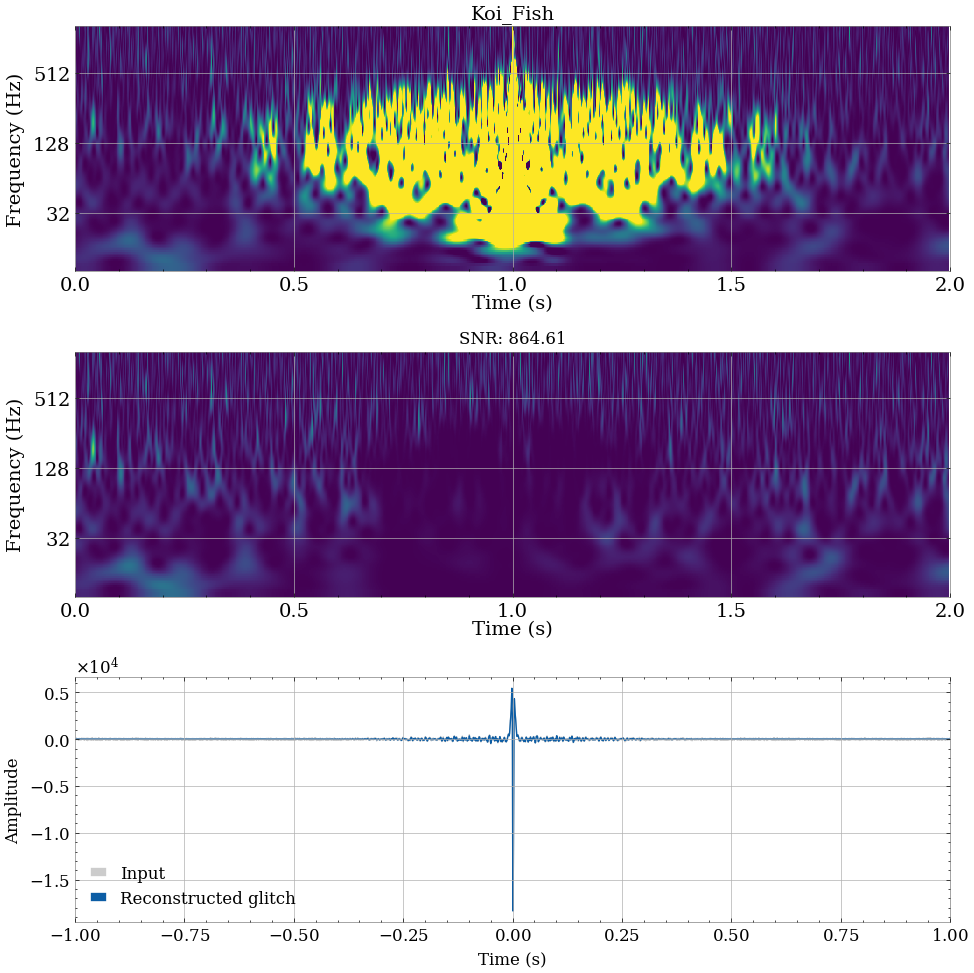

In [25]:
# generate a few glitches to test if everything is working
# if no GPU is present it will take ~ 20 seconds per glitch 
g_hat,g_metadata, psd_temp = glitch_generator.get_random_glitch(seed = 911,plot_glitches = True, return_psd=True)



In [88]:
print(g_metadata)
print('-------------')
print(type(g_metadata))
print('-------------')
print(type(psd_temp))
print(psd_temp.kind)
#print(psd_temp.to_timeseries())
print(len(g_hat))
print(type(g_hat))

event_time                                         1263043745.51074
ifo                                                              H1
duration                                                       2.25
peak_frequency                                           142.362854
central_freq                                              1924.4552
bandwidth                                               3818.320801
amplitude                                                       0.0
snr                                                      864.611694
q_value                                                    5.656854
gravityspy_id                                            U9nCGN9gn5
label                                                      Koi_Fish
ml_confidence                                              0.955986
url1              https://panoptes-uploads.zooniverse.org/produc...
url2              https://panoptes-uploads.zooniverse.org/produc...
url3              https://panoptes-uploads.zooni

N. 1 glitches to be injected in frame 


  0%|          | 0/1 [00:00<?, ?it/s]

Time Used for Downloading glitch data is 24.9894 second
data kind of glitch timeseries is real
length of original glitch timeseries former frame before whiten is 14.0 second
length of psd frequencyseries former frame is 7.000244140625
length of reference whiten timeseries former frame is 14.0 second
length of whitened glitch is 14.0 seconds
length of centered and whitened glitch is 2.0 seconds
Time Used for Fetching glitch data is 25.0799 second


/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(


Time Used for DeepExtractor is 0.2729 second


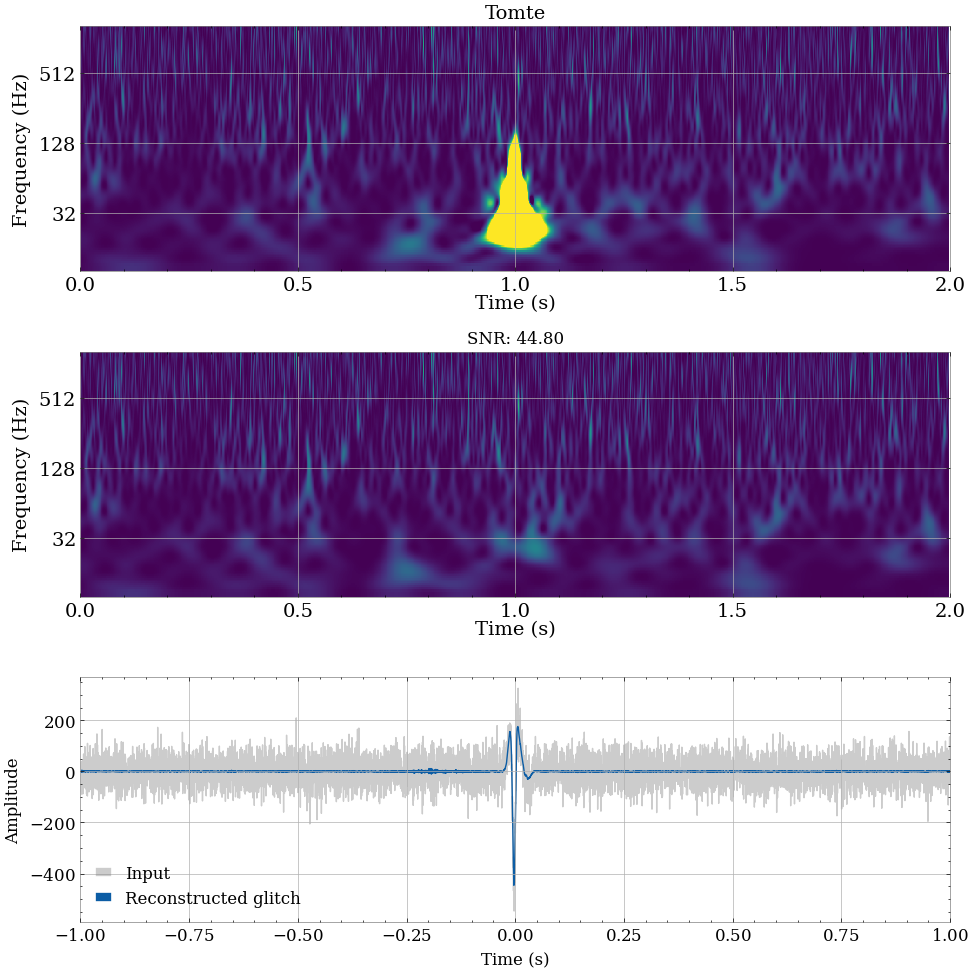

100%|██████████| 1/1 [00:26<00:00, 26.26s/it]


In [49]:
# To generate frame 
frame_1,to_previous_frame,to_future_frame,metadata_1 = glitch_stream.generate_frame(seed = 911,
                                                                                    plot_glitches=True,
                                                                                    return_whitened = True,
                                                                                    t0 = 0,
                                                                                    verbose = 1)



In [ ]:
print(metadata_1.index)
print(metadata_1.iloc[0][0:5])
print(metadata_1.iloc[0].info())
print("-------------")
print(type(frame_1))
print(frame_1.times[0:10])

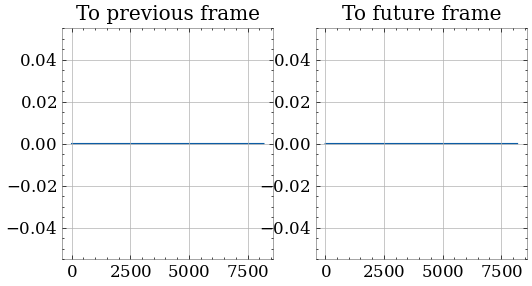

In [115]:
plt.figure(figsize = [6,3])
plt.subplot(121)
plt.title("To previous frame")
plt.plot(to_previous_frame)
plt.subplot(122)
plt.title("To future frame")
plt.plot(to_future_frame)
plt.show()


In [50]:
# color frame with ET PSD
frame_1_coloured = glitch_stream.color_glitch_frame(frame_1)

In [51]:
print(glitch_stream.psd.size)
print(glitch_stream.inverse_psd.size)
print('-------------')
print(frame_1_coloured)
print("---------------------")
print(frame_1_coloured.size)
#frame_1_array = np.array(frame_1)
#print(np.argwhere(frame_1_array != 0).size)
#print(frame_1_array.size)

#print(np.argwhere(frame_1_coloured!=0))

30721
30721
-------------
TimeSeries([-2.85504743e-23, -2.50727913e-23, -2.16975757e-23,
            ...,  1.97856295e-23,  2.03544814e-23,
             2.09073820e-23]
           unit: dimensionless,
           t0: 0.0 s,
           dt: 0.000244140625 s,
           name: None,
           channel: None)
---------------------
40960


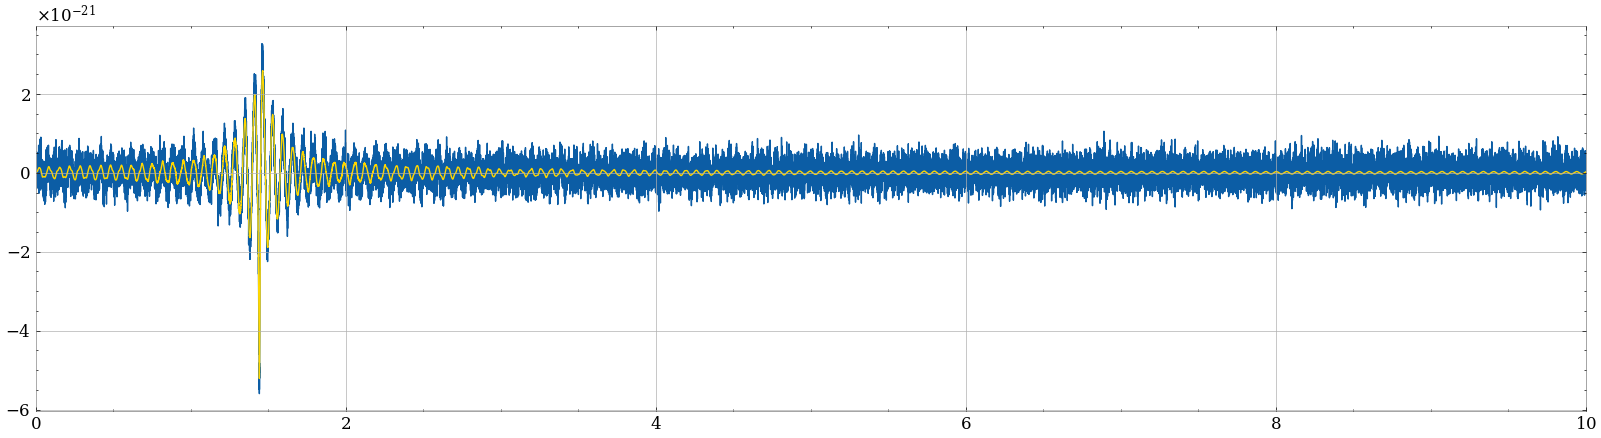

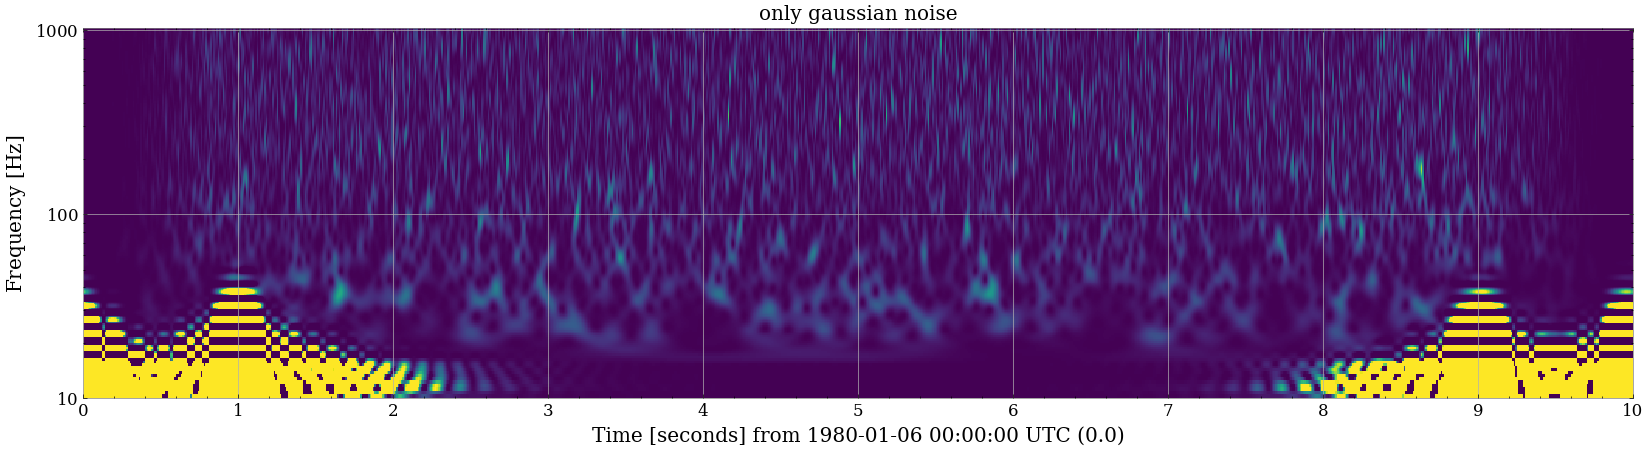

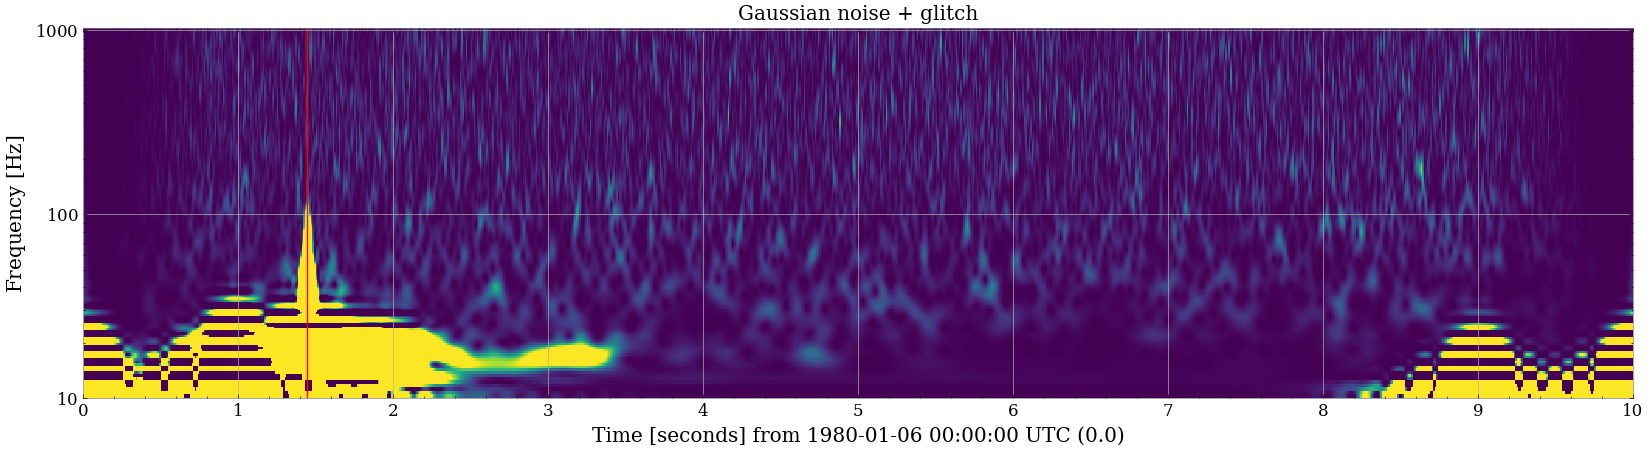

In [52]:
# plot results onb top of gaussian noise
ifo.set_strain_data_from_power_spectral_density(
    sampling_frequency=glitch_stream.sampling_frequency,
    duration=glitch_stream.duration,
    start_time=0, # type: ignore
)

base_noise = TimeSeries(ifo.time_domain_strain,dt = 1/glitch_stream.sampling_frequency,t0 = 0)
glitched_timeseries = base_noise + np.array(frame_1_coloured)

glitch_times = np.array(metadata_1.frame_time)



plt.figure(figsize = [20,5])
# white_noise_and_glitch = np.random.normal(0,50,size = len(glitch_frame))  +glitch_frame
# plt.plot(white_noise_and_glitch)
# plt.subplot(131)
t = np.array(glitched_timeseries.times)
plt.plot(t,glitched_timeseries)
plt.plot(t,frame_1_coloured,color = "gold")
plt.xlim(0,glitch_stream.duration)
plt.show()

# plt.subplot(132)
q_scan = base_noise.q_transform(qrange = (8,64),
                                frange = (10,1024),
                                whiten = True
                                )
q_scan.plot(vmin = 0,vmax = 25,figsize = [20,5],title = "only gaussian noise")

plt.yscale("log")

q_scan = glitched_timeseries.q_transform(qrange = (8,64),
                                frange = (10,1024),
                                whiten = True,
                                )
q_scan.plot(vmin = 0,vmax = 25,figsize = [20,5],title = "Gaussian noise + glitch")
for glitch_time in glitch_times:
    plt.axvline(glitch_time,color = "red")
plt.yscale("log")
plt.show()

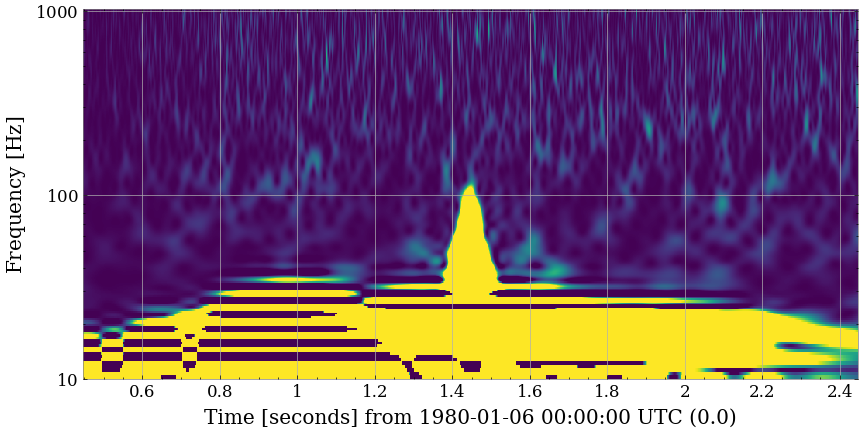

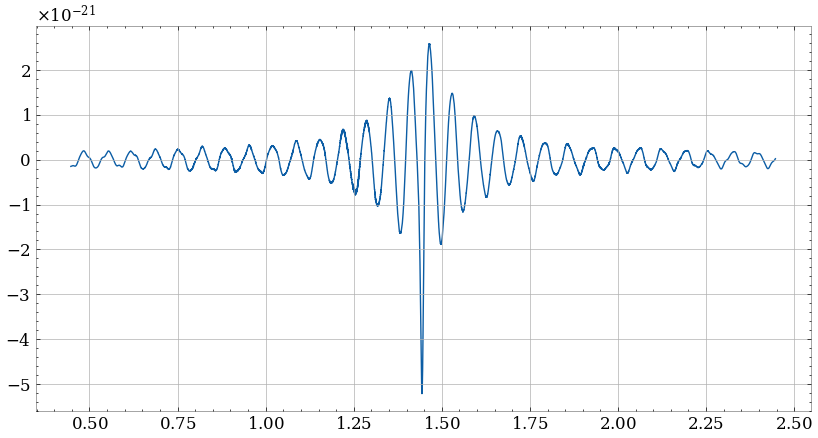

In [54]:
# plot single glitch to double check everything's good
idx = 0
t_g = glitch_times[idx]

q_scan = glitched_timeseries.q_transform(qrange = (8,64),
                                frange = (10,1024),
                                outseg = (t_g-1,t_g+1),
                                whiten = True
                                )
q_scan.plot(vmin = 0,vmax = 25,figsize = [10,5])


plt.yscale("log")
plt.show()
plt.figure(figsize = [10,5])
plt.plot(frame_1_coloured.crop(t_g-1,t_g+1))

Time Used for Downloading glitch data is 20.5159 second
data kind of glitch timeseries is real
length of original glitch timeseries former frame before whiten is 14.0 second
length of psd frequencyseries former frame is 7.000244140625
length of reference whiten timeseries former frame is 14.0 second
length of whitened glitch is 14.0 seconds
length of centered and whitened glitch is 2.0 seconds


/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(


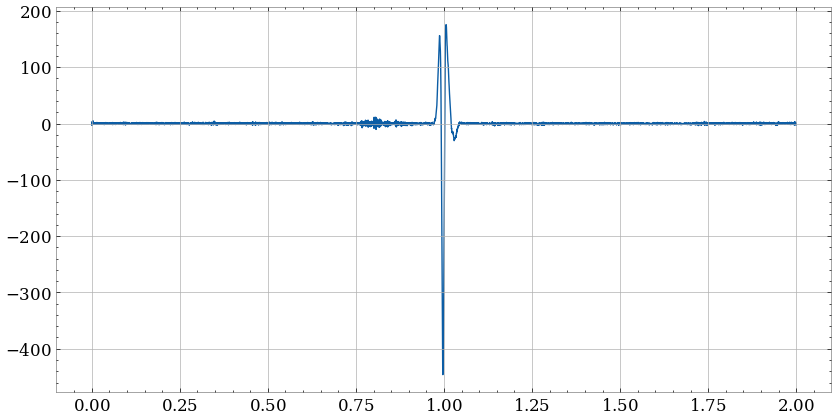

In [55]:
# re-extract original glitch just to double check
gps_time,ifo_name = metadata_1.iloc[idx][["event_time","ifo"]]
psd,glitch_timeseries,glitch = glitch_generator.glitch_downloader.get_glitch(gps_time,ifo_name)

g_hat,n_hat = glitch_generator.deepextractor(glitch)
g_hat_timeseries = TimeSeries(g_hat,dt = 1/4096)
plt.figure(figsize = [10,5])

plt.plot(g_hat_timeseries)

# second frame

In [58]:
# handle phasing from previous frame
len_phasing = len(to_future_frame)
from_previous_frame  = to_future_frame
frame_2,to_previous_frame,to_future_frame,metadata_2 = glitch_stream.generate_frame(seed = 905,plot_glitches=False,return_whitened = True)
frame_2[:len_phasing] += from_previous_frame
frame_2_coloured = glitch_stream.color_glitch_frame(frame_2)


Time Used for Downloading glitch data is 26.7942 second
data kind of glitch timeseries is real
length of original glitch timeseries former frame before whiten is 14.0 second
length of psd frequencyseries former frame is 7.000244140625
length of reference whiten timeseries former frame is 14.0 second
length of whitened glitch is 14.0 seconds
length of centered and whitened glitch is 2.0 seconds
Time Used for Fetching glitch data is 26.8954 second
Time Used for DeepExtractor is 0.2414 second
Time Used for Downloading glitch data is 26.6804 second
data kind of glitch timeseries is real
length of original glitch timeseries former frame before whiten is 14.0 second
length of psd frequencyseries former frame is 7.000244140625
length of reference whiten timeseries former frame is 14.0 second
length of whitened glitch is 14.0 seconds
length of centered and whitened glitch is 2.0 seconds
Time Used for Fetching glitch data is 26.7634 second
Time Used for DeepExtractor is 0.0176 second
Time Used 

In [65]:
ifo.name

'H1'

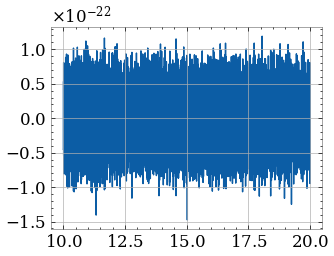

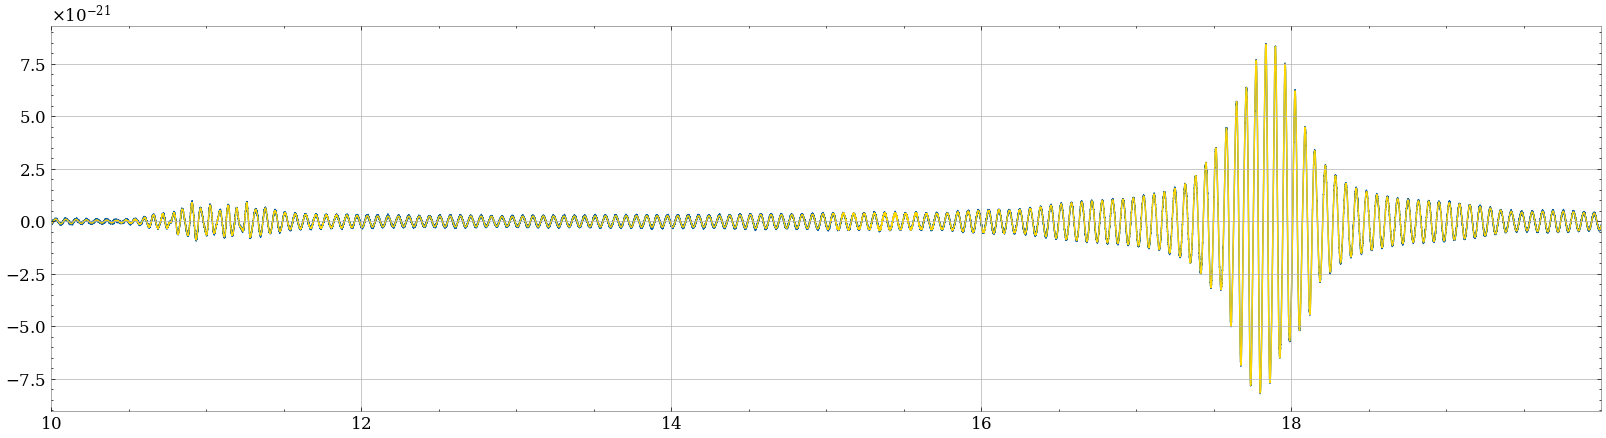

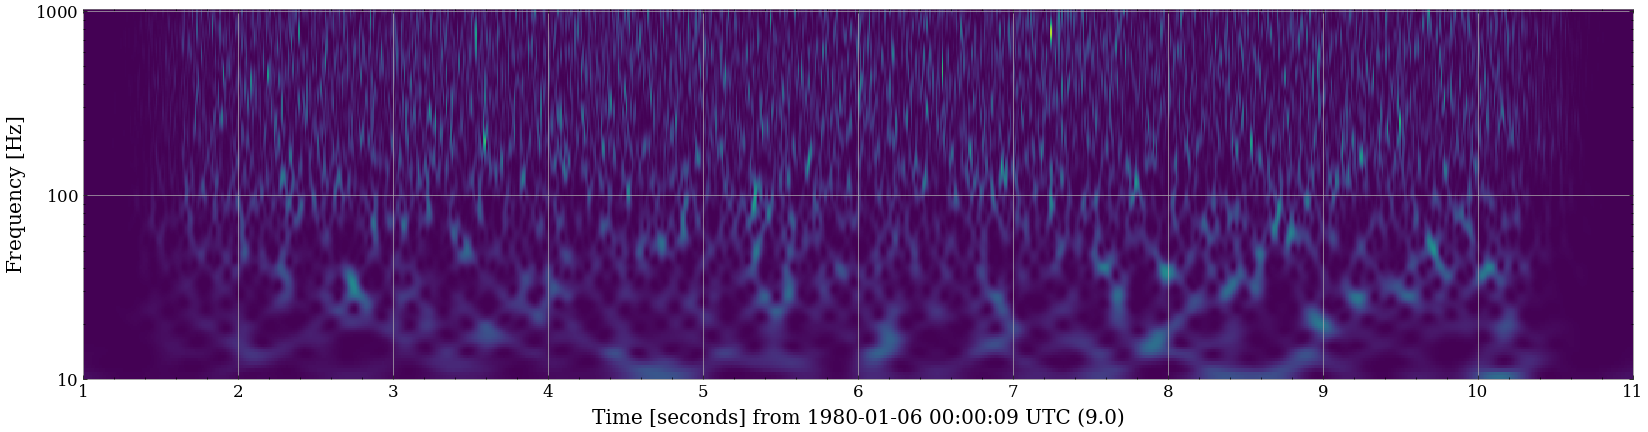

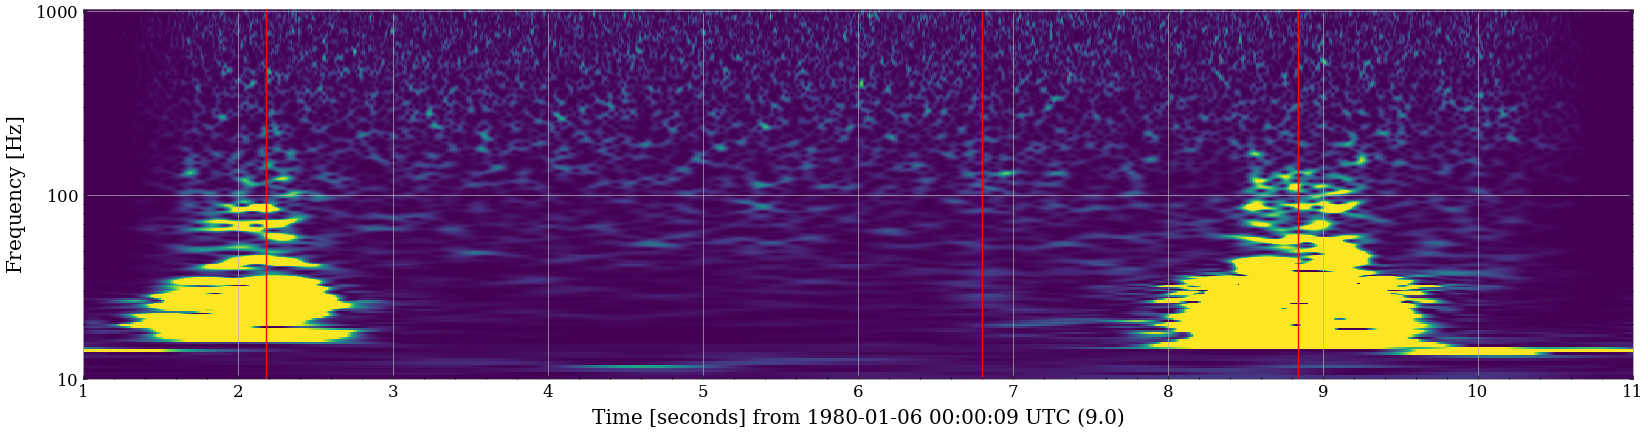

In [68]:
#ifo = bilby.gw.detector.InterferometerList(["ET"])[0]
ifo.set_strain_data_from_power_spectral_density(
    sampling_frequency=glitch_stream.sampling_frequency,
    duration=glitch_stream.duration,
    start_time=0, # type: ignore
)

base_noise = TimeSeries(ifo.time_domain_strain,dt = 1/glitch_stream.sampling_frequency,t0 = frame_2.t0)
t = np.array(base_noise.times)
plt.plot(t,base_noise)
plt.show()
glitched_timeseries = base_noise +np.array(frame_2_coloured)

glitch_times = np.array(metadata_2.frame_time)



plt.figure(figsize = [20,5])

t = np.array(glitched_timeseries.times)
plt.plot(t,glitched_timeseries)
plt.plot(t,frame_2_coloured,color = "gold")
plt.xlim(t[0],t[-1])
plt.show()

q_scan = base_noise.q_transform(qrange = (8,64),
                                frange = (10,1024),
                                whiten = True
                                )
q_scan.plot(vmin = 0,vmax = 25,figsize = [20,5])

plt.yscale("log")

q_scan = glitched_timeseries.q_transform(qrange = (8,64),
                                frange = (10,1024),
                                whiten = True,
                                )
q_scan.plot(vmin = 0,vmax = 25,figsize = [20,5])
for glitch_time in glitch_times:
    plt.axvline(glitch_time,color = "red")
plt.yscale("log")
plt.show()

#  cobine multiple frames

In [ ]:
metadata = pd.concat([metadata_1,metadata_2])

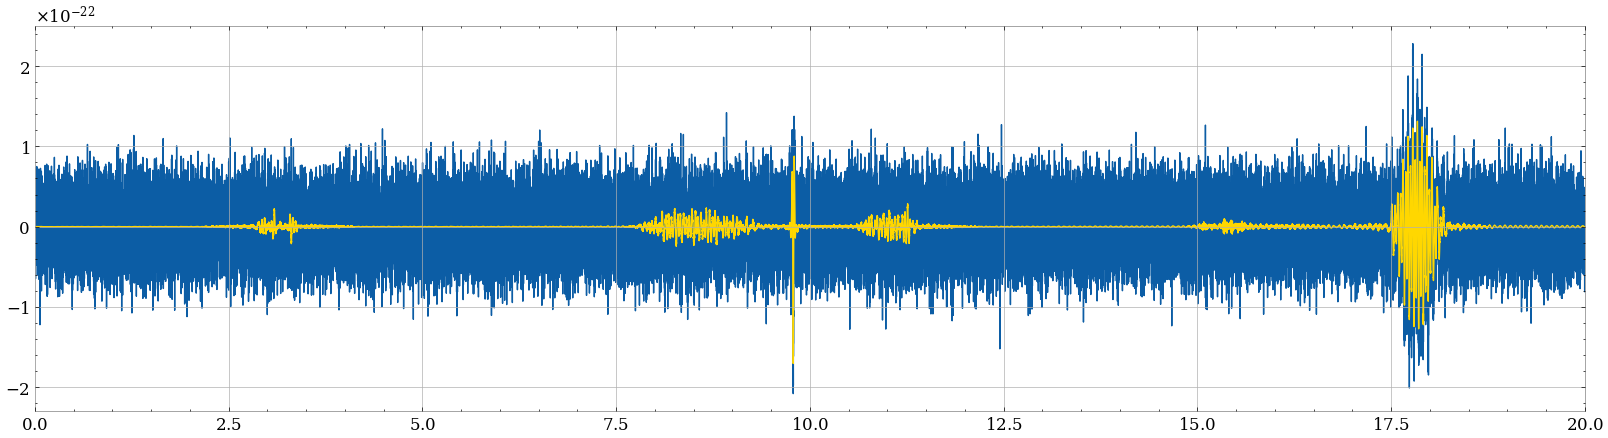

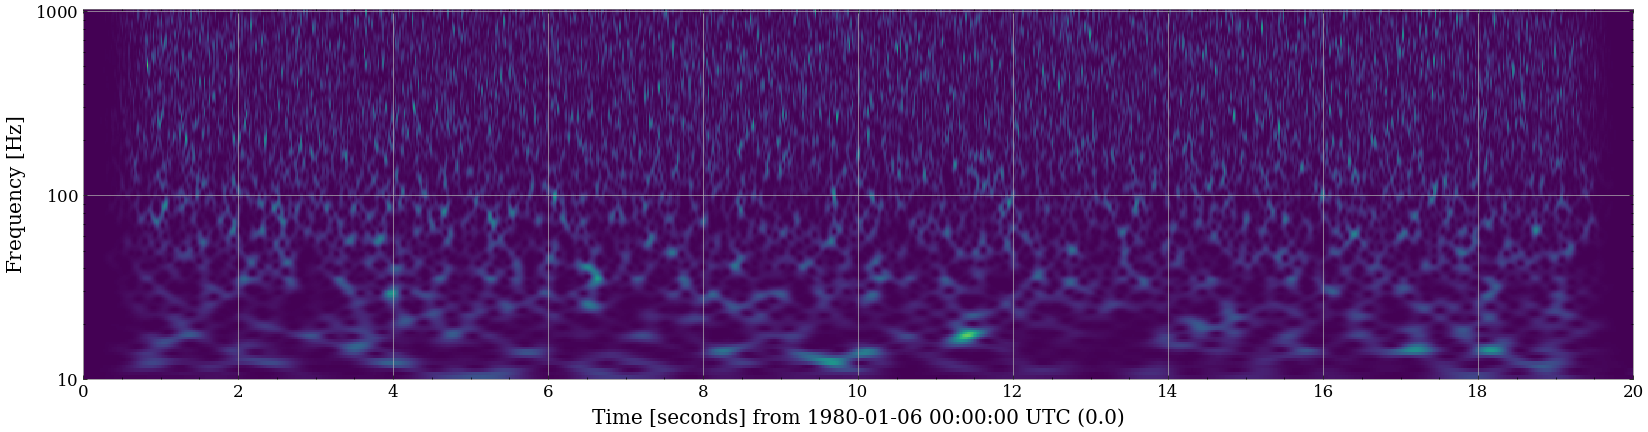

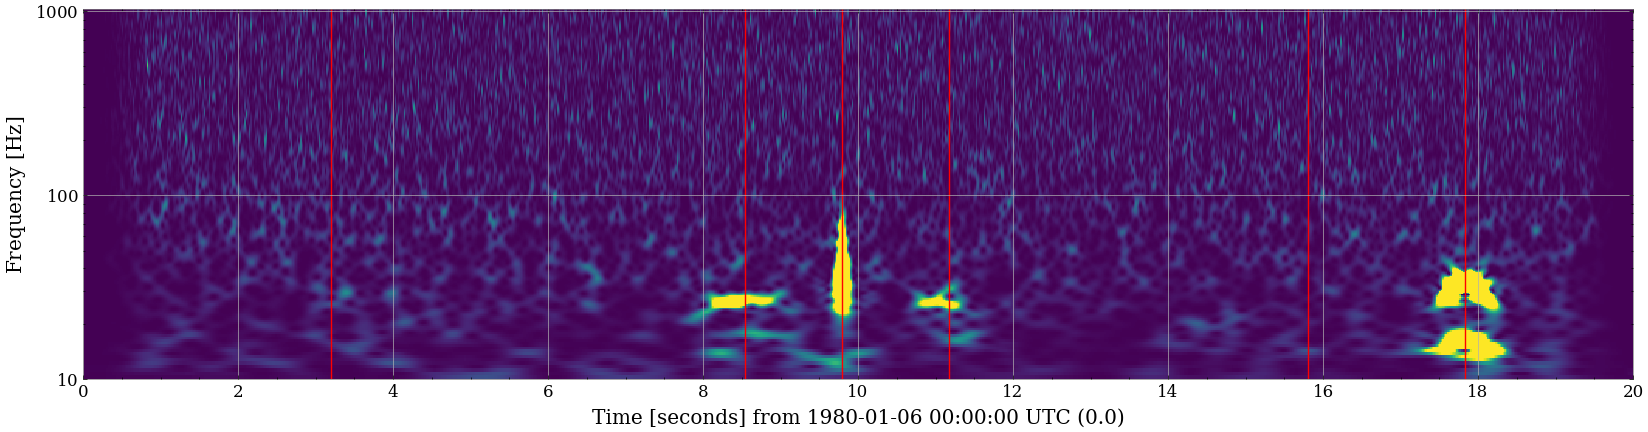

In [ ]:
# check if frames collate
frame_tot = np.concatenate([frame_1_coloured,frame_2_coloured])

ifo = bilby.gw.detector.InterferometerList(["ET"])[0]
ifo.set_strain_data_from_power_spectral_density(
    sampling_frequency=glitch_stream.sampling_frequency,
    duration=glitch_stream.duration*2,
    start_time=0, # type: ignore
)

base_noise = TimeSeries(ifo.time_domain_strain,dt = 1/glitch_stream.sampling_frequency,t0 = 0)
glitched_timeseries = base_noise +np.array(frame_tot)

glitch_times = np.array(metadata.frame_time)



plt.figure(figsize = [20,5])
t = np.array(glitched_timeseries.times)
plt.plot(t,glitched_timeseries)
plt.plot(t,frame_tot,color = "gold")
plt.xlim(0,glitch_stream.duration*2)
plt.show()

q_scan = base_noise.q_transform(qrange = (8,64),
                                frange = (10,1024),
                                whiten = True
                                )
q_scan.plot(vmin = 0,vmax = 25,figsize = [20,5])

plt.yscale("log")

q_scan = glitched_timeseries.q_transform(qrange = (8,64),
                                frange = (10,1024),
                                whiten = True,
                                )
q_scan.plot(vmin = 0,vmax = 25,figsize = [20,5])
for glitch_time in glitch_times:
    plt.axvline(glitch_time,color = "red")
plt.yscale("log")
plt.show()

(9.9, 10.1)

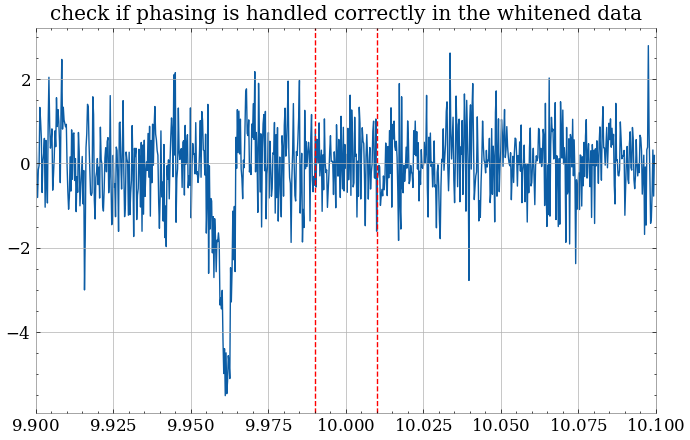

In [ ]:
plt.figure(figsize = [8,5])
frame_tot = np.concatenate([frame_1,frame_2])

plt.title("check if phasing is handled correctly in the whitened data")
plt.plot(frame_tot.crop(9.9,10.1))
plt.axvline(9.99 ,color = "red",linestyle = "dashed")
plt.axvline(10.01,color = "red",linestyle = "dashed")

plt.xlim(9.9,10.1)